In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def test_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
    print("Balanced accuracy: {}".format(bal_acc))
    print_metrics(y_pred, y_test)



# Calculates the per-class accuracy given predicted and true output labels.
def class_accs(y_pred, y_true):
    acc0 = ((y_pred == y_true) & (y_true == 0)).sum() / (y_true == 0).sum()
    acc1 = ((y_pred == y_true) & (y_true == 1)).sum() / (y_true == 1).sum()
    return acc0, acc1

# Prints a summary of performance metrics given predicted and true output labels.
def print_metrics(y_pred, y_true):
    f1 = metrics.f1_score(y_true, y_pred)
    acc = metrics.accuracy_score(y_true, y_pred)
    acc0, acc1 = class_accs(y_pred, y_true)
    print(f'\tF1 = {f1}')
    print(f'\tAccuracy = {acc}')
    print(f'\t\tclass 0: {acc0}')
    print(f'\t\tclass 1: {acc1}')

In [ ]:
# Import data and make it nice (see notebook data_exploration_loan.ipynb)

df = pd.read_csv('../loan_data_set.csv')

df = df.drop("Loan_ID", axis=1)

df = df.dropna(axis=0)

d1 = {"Y": 1, "N": 0}
d2 = {"Yes": 1, "No": 0}
d3 = {"Male": 1, "Female": 0}
d4 = {"0": 0, "1": 1, "2": 2, "3+": 3}
d5 = {"Graduate": 1, "Not Graduate": 0}
d6 = {"Rural": 0, "Semiurban": 0.5, "Urban": 1}

cleanup_nums = {"Loan_Status": d1, "Married": d2, "Self_Employed": d2, "Gender": d3,
"Dependents": d4, "Education": d5, "Property_Area": d6}

df.replace(cleanup_nums, inplace=True)

In [ ]:
# Convert everything to array
X = df.values[:,:-1]
y = df.values[:,-1]
feature_names = df.columns[:-1]

In [ ]:
seed = 1998

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [ ]:
def knn(x_train, y_train, x_test, y_test,n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)
        #matrix = confusion_matrix(y_test,predict_y)
        #seaborn_matrix = sns.heatmap(matrix, annot = True, cmap="Blues",cbar=True)
        results.append(accuracy)
        print(f"Results for model with K = {n}")
        test_model(x_train, y_train, x_test, y_test, knn)
    return results

Results for model with K = 1
Balanced accuracy: 0.5125038592158073
	F1 = 0.675
	Accuracy = 0.5666666666666667
		class 0: 0.34146341463414637
		class 1: 0.6835443037974683
Results for model with K = 2
Balanced accuracy: 0.5580426057425132
	F1 = 0.5925925925925926
	Accuracy = 0.5416666666666666
		class 0: 0.6097560975609756
		class 1: 0.5063291139240507
Results for model with K = 3
Balanced accuracy: 0.4827107131830812
	F1 = 0.6826347305389221
	Accuracy = 0.5583333333333333
		class 0: 0.24390243902439024
		class 1: 0.7215189873417721
Results for model with K = 4
Balanced accuracy: 0.5165174436554493
	F1 = 0.6164383561643836
	Accuracy = 0.5333333333333333
		class 0: 0.4634146341463415
		class 1: 0.569620253164557
Results for model with K = 5
Balanced accuracy: 0.5026242667489966
	F1 = 0.7272727272727272
	Accuracy = 0.6
		class 0: 0.1951219512195122
		class 1: 0.810126582278481
Results for model with K = 6
Balanced accuracy: 0.5382834208088917
	F1 = 0.7185628742514971
	Accuracy = 0.6083333

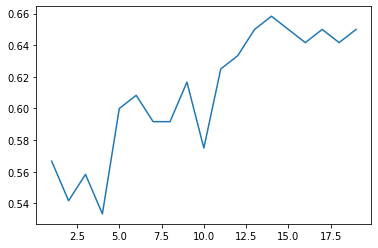

In [ ]:
output = knn(X_train, y_train, X_test, y_test, 20)
n_range = range(1,20)

plt.plot(n_range, output)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5161fece-8ef6-4825-9ea6-16ebba884483' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>